In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

pd.options.display.max_rows = 14
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn import datasets
import sklearn.model_selection as ms

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set(style= 'ticks')

from sklearn.cluster import KMeans

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [3]:
X_train, X_test, y_train, y_test = ms.train_test_split(iris['data'], iris['target'], test_size = 0.1, random_state=42) 

In [4]:
X_train.shape

(135, 4)

In [5]:
y_train.shape

(135,)

In [6]:
def performance(a,b,c):
    crossvalpredictions = cross_val_predict(a,b,c, cv=3)
    print("\033[1m**confusion matrix** \033[22m")
    mat = confusion_matrix(c, crossvalpredictions)
    print(mat)
    print("\033[1m**classification report** \033[22m")
    print(classification_report(c, crossvalpredictions))
    print("\033[1m**accuracy** \033[22m")
    print(cross_val_score(a,b, c, cv=3, scoring='accuracy').mean())
    print("\033[1m**heat map** \033[22m")
    x = sns.heatmap(mat, annot = True)

# Random Forest Classifier

In [7]:
forest_clf = RandomForestClassifier(random_state=42)
x = forest_clf.fit(X_train, y_train)
y = forest_clf.predict(X_train)

**confusion matrix** 
[[44  0  0]
 [ 0 41  3]
 [ 0  4 43]]
**classification report** 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.91      0.93      0.92        44
          2       0.93      0.91      0.92        47

avg / total       0.95      0.95      0.95       135

**accuracy** 
0.948264239973
**heat map** 


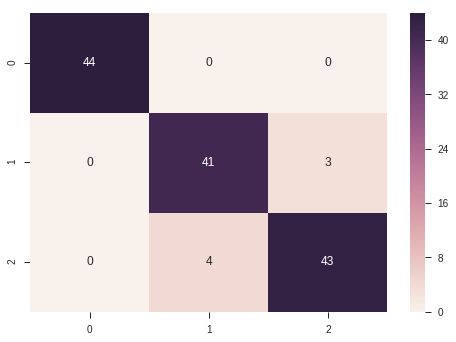

In [8]:
performance(forest_clf, X_train, y_train)

# Tuning hyper parameters

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid = [
        {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [1, 2, 3, 4]}
    ]
rf_clf = RandomForestClassifier(random_state = 42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs = 4)
x = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 2, 'n_estimators': 20}

In [11]:
rf_clf1 = RandomForestClassifier(random_state=42, **grid_search.best_params_)

**confusion matrix** 
[[44  0  0]
 [ 0 42  2]
 [ 0  4 43]]
**classification report** 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.91      0.95      0.93        44
          2       0.96      0.91      0.93        47

avg / total       0.96      0.96      0.96       135

**accuracy** 
0.956016177958
**heat map** 


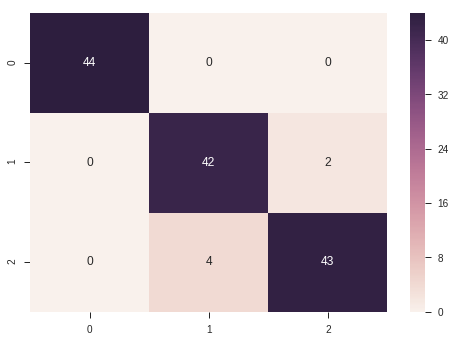

In [12]:
performance(rf_clf1, X_train, y_train)

##### Before Tuning ---- 0.948264239973
##### After Tuning ---- 0.956016177958

# Gaussian Naive Bayes Classifier

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
x = gnb_clf.fit(X_train, y_train)
y = gnb_clf.predict([X_train[0]])

**confusion matrix** 
[[44  0  0]
 [ 0 39  5]
 [ 0  3 44]]
**classification report** 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.93      0.89      0.91        44
          2       0.90      0.94      0.92        47

avg / total       0.94      0.94      0.94       135

**accuracy** 
0.941017863161
**heat map** 


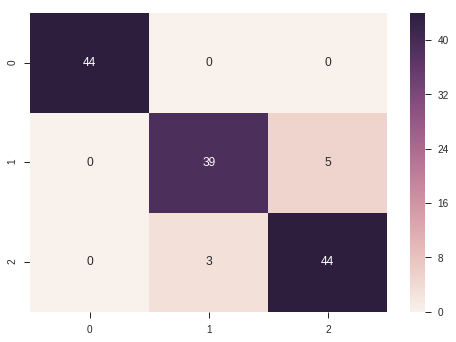

In [14]:
performance(gnb_clf, X_train, y_train)

# Gradient Boosting Classifier

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(max_depth = 2, n_estimators = 3, learning_rate = 0.5)
x = gb_clf.fit(X_train, y_train)

**confusion matrix** 
[[44  0  0]
 [ 0 41  3]
 [ 0  1 46]]
**classification report** 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.98      0.93      0.95        44
          2       0.94      0.98      0.96        47

avg / total       0.97      0.97      0.97       135

**accuracy** 
0.970508931581
**heat map** 


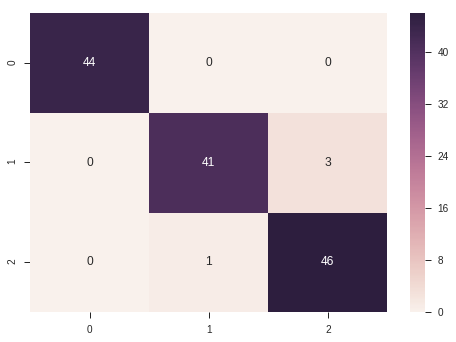

In [16]:
performance(gb_clf, X_train, y_train)

# KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
x = knn_clf.fit(X_train, y_train)
y = knn_clf.predict(X_train)

**confusion matrix** 
[[44  0  0]
 [ 0 41  3]
 [ 0  3 44]]
**classification report** 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.93      0.93      0.93        44
          2       0.94      0.94      0.94        47

avg / total       0.96      0.96      0.96       135

**accuracy** 
0.956016177958
**heat map** 


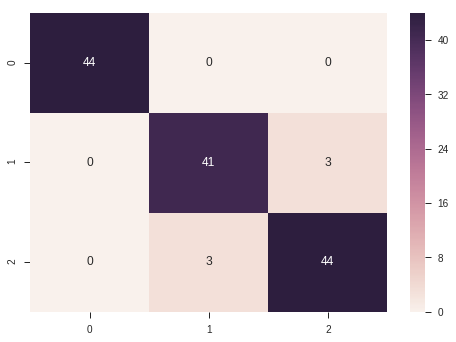

In [19]:
performance(knn_clf, X_train, y_train)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression()
x = lg_clf.fit(X_train, y_train)
y = lg_clf.predict(X_train)

**confusion matrix** 
[[44  0  0]
 [ 0 36  8]
 [ 0  0 47]]
**classification report** 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       1.00      0.82      0.90        44
          2       0.85      1.00      0.92        47

avg / total       0.95      0.94      0.94       135

**accuracy** 
0.942028985507
**heat map** 


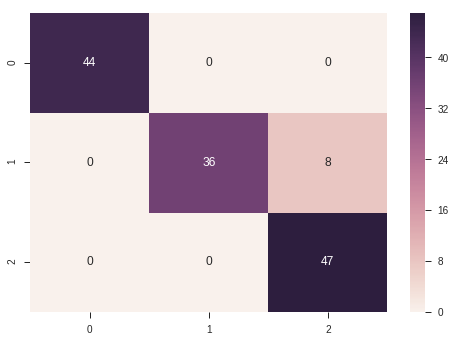

In [21]:
performance(lg_clf, X_train, y_train)

# SVC

In [22]:
from sklearn import svm
sv_clf = svm.SVC()
x = sv_clf.fit(X_train, y_train)
y = sv_clf.predict(X_train)

**confusion matrix** 
[[44  0  0]
 [ 0 40  4]
 [ 0  1 46]]
**classification report** 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.98      0.91      0.94        44
          2       0.92      0.98      0.95        47

avg / total       0.96      0.96      0.96       135

**accuracy** 
0.963262554769
**heat map** 


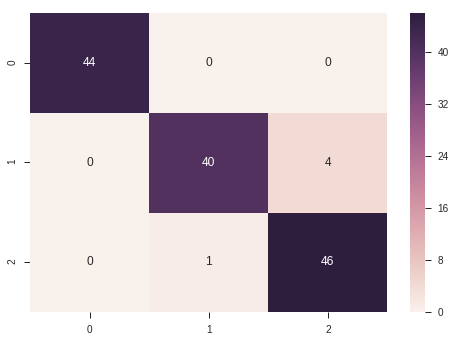

In [23]:
performance(sv_clf, X_train, y_train)

# Tuning Hyper parameters

In [24]:
param_grid = [
        {'C': [0.1, 0.2, 0.3, 0.4, 0.5], 'gamma': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35], 'kernel' : ['linear', 'rbf', 'poly'], 'degree' : range(1,5)}
    ]
sv_clf1 = svm.SVC()
grid_search = GridSearchCV(sv_clf1, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs = 4)
x = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 0.2, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}

In [25]:
sv_clf2 = svm.SVC(**grid_search.best_params_)

**confusion matrix** 
[[44  0  0]
 [ 0 42  2]
 [ 0  1 46]]
**classification report** 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.98      0.95      0.97        44
          2       0.96      0.98      0.97        47

avg / total       0.98      0.98      0.98       135

**accuracy** 
0.977755308392
**heat map** 


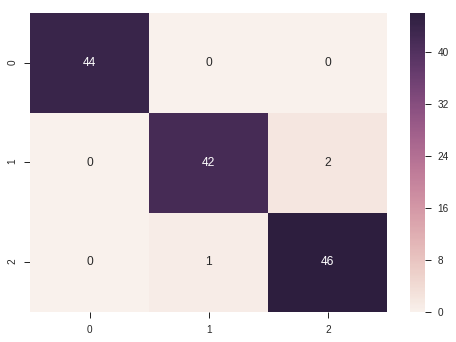

In [26]:
performance(sv_clf2, X_train, y_train)

##### Before Tuning ---- 0.963262554769
##### After Tuning ---- 0.977755308392

# Perceptron

In [27]:
from sklearn.linear_model import Perceptron
perc_clf = Perceptron(random_state = 42)
x = perc_clf.fit(X_train, y_train)
y = perc_clf.predict(X_train)

**confusion matrix** 
[[41  3  0]
 [ 8 36  0]
 [ 0 13 34]]
**classification report** 
             precision    recall  f1-score   support

          0       0.84      0.93      0.88        44
          1       0.69      0.82      0.75        44
          2       1.00      0.72      0.84        47

avg / total       0.85      0.82      0.82       135

**accuracy** 
0.82406471183
**heat map** 


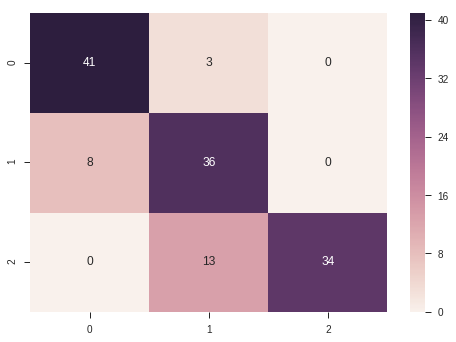

In [28]:
performance(perc_clf, X_train, y_train)

# LDA

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis(n_components = 2)
x = lda_clf.fit(X_train, y_train)
y = lda_clf.predict(X_train)

**confusion matrix** 
[[44  0  0]
 [ 0 42  2]
 [ 0  1 46]]
**classification report** 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.98      0.95      0.97        44
          2       0.96      0.98      0.97        47

avg / total       0.98      0.98      0.98       135

**accuracy** 
0.978260869565
**heat map** 


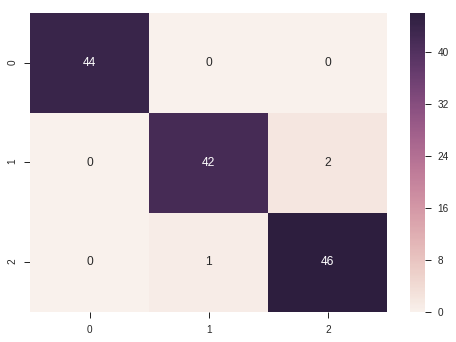

In [30]:
performance(lda_clf, X_train, y_train)

##### Out of all the different classifiers used LDA has got good performance results with an accuracy of 0.978260869565 and  Perceptron has got the least accuracy of 0.82406471183